# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/machinelearning-az.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Instalar dependendias

In [ ]:
!pip install sklearn

# Clasificación con árboles de Decisión

# Cómo importar las librerías


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

# Dividir el data set en conjunto de entrenamiento y conjunto de testing

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# Cómo los árboles de decisión no se basan en la distancia (ya sea euclídea, manhattan, etc) no requieren de un reescalado previo

# Ajustar el clasificador de Árbol de Decisión en el Conjunto de Entrenamiento

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0) # criterion: criterio mediante el cual se divide una rama en hojas (gini o entropy, este último mide la dispersión de los datos), llegando en los posible a tener la máxima cantidad posible de nodos hoja finales con 1 tipo de dato (si la entroía en un nodo hijo llega a 0, significa que el nodo es homogeneo, con 100% de seguridad en la predicción) 
classifier.fit(X_train, y_train)
print(classifier.get_params()) # para ver los parámetros de la regresión hecha
print(classifier.score(X_train,y_train)) # vemos el accuracy de la predicción de la clasificación (con datos de entrenamiento)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}
1.0


# Predicción de nuestros modelos con Random Forest


In [6]:
y_pred  = classifier.predict(X_test)

# Elaborar una matriz de confusión

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
# Vemos que el accuracy del modelo con respecto a los datos de test (sin tomar desbalanceo entre clases) es de 91/100 = 0,91
# En este caso, solo 6 observaciones fueron catalogadas como compras cuando en verdad no lo fueron, y 3 observaciones fueron catalogadas como no compras cuando en verdad lo fueron
# (no compras acertadas:62, compras acertadas:29)

array([[62,  6],
       [ 3, 29]], dtype=int64)

# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento

In [8]:
from matplotlib.colors import ListedColormap

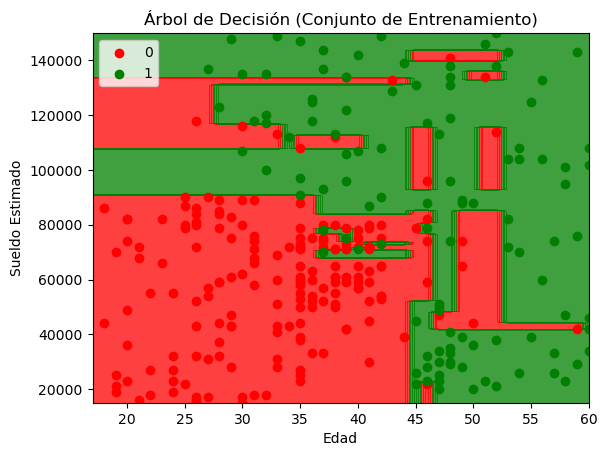

In [13]:
# Vemos el límite de nuestro clasificador (frontera de decisión) con respecto a los datos de train (100% de accuracy antes marcado). Usamos 2 variables indep para visualizar la clasificación en un gráfico 2D (podemos usar 3 para 3D)
# Crear el grid para el contorno
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=1), # el step 0.01 es adecuado para datos reescalados, para datos que no lo están nos conviene poner valores acorde a los observados en el set
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=500)) # por ej: step=1 en la parte de arriba (x1, años) y step=500 en la parte de abajo (x2, sueldo), sino gastaríamos recursos computacionales pintando miles de puntos que no vamos a llegar a visualizar

# Predecir sobre el grid de puntos y reshape para contorno
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Definir la paleta de colores usando códigos RGB 
colors = [(1, 0, 0), (0, 0.5, 0)]  # rojo (no compra) y verde oscuro (compra) [(valor 0 de pred, valor 1 de pred)]
cmap = ListedColormap(colors)

# Graficar el contorno y los puntos de datos
plt.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de datos con scatter
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=cmap(i), label=j)
plt.title('Árbol de Decisión (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

# Tenemos un límite de predicción basado en lineas horizontales y verticales, basados en condiciones de los valores de las variables independientes usadas para predecir
# El hecho de no haber reescalado los datos, nos permite analizar con más precisión (volver a reescalar los datos a su valor original en caso de requerir estandarización o algún otro reescalado previo de los datos)
# Intenta acoplar el límite de decisión a todos los datos brindados, es por eso que este algoritmo tiende mucho al sobreajuste (genera subdivisiones a partir de outliers o datos extraños, perdiendo capacidad de predicción frente a nuevos datos)

# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing

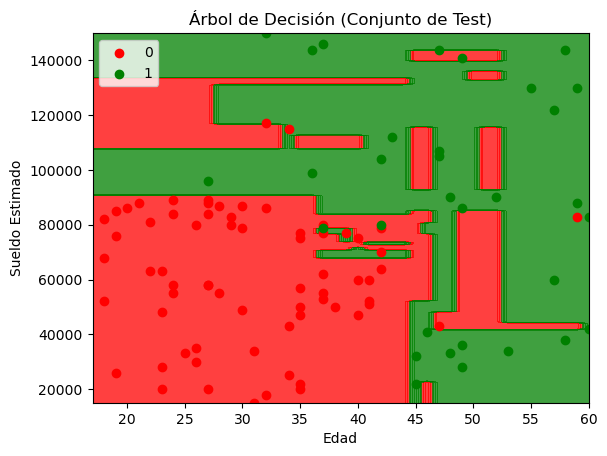

In [14]:
# Vemos el límite de nuestro clasificador (frontera de decisión) con respecto a los datos de test (90% de accuracy antes marcado). Similar análisis que con la matriz de confusión.
# Aplica la misma frontera de decisión conseguida con train a los datos de test. Análisis similar al de la matriz de confusión

# Crear el grid para el contorno
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=1),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=500))

# Predecir sobre el grid de puntos y reshape para contorno
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Definir la paleta de colores usando códigos RGB 
colors = [(1, 0, 0), (0, 0.5, 0)]  # rojo (no compra) y verde oscuro (compra) [(valor 0 de pred, valor 1 de pred)]
cmap = ListedColormap(colors)

# Graficar el contorno y los puntos de datos
plt.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de datos con scatter
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=cmap(i), label=j)
plt.title('Árbol de Decisión (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

# Pareciera que, al intentar ajustarse tanto a los datos de entrenamiento, el modelo ha perdido capacidad predictiva en comparación de algoritmos como Naive Bayes o SVM, produciendo Overffiting (mejor ajuste con respecto a train a costa de un menor rendimiento en la predicción)
# Hay algunos datos que vemos que, debiendo normalmente pertenecer a una clase por su ubicación, no pertenecen por este sobreajuste del modelo. También lo podemos ver con los rectángulos que no tienen utilidad alguna para la predicción. Sin embargo, el resultado no es tan malo